<a href="https://colab.research.google.com/github/HimanshuSahoo/Python-for-Data-Scientist/blob/main/webScrapExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def get_page(url):
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    return(soup)

In [ ]:
def get_links(soup):
    links = []
    linkslist = soup.find_all('a',{'class':'bookTitle'})
    base_url = "https://www.goodreads.com"
    for i in linkslist:
        book_link = i.get('href')
        complete_link = base_url + book_link
        links.append(complete_link)
    return(links)

In [ ]:
def extract_info(links):
    all_books = []
    for link in links:
        req = requests.get(link)
        book_soup = BeautifulSoup(req.text, 'html.parser')
        try:
            title = book_soup.find('h1',{'id':'bookTitle'}).text.strip()
            author = book_soup.find('span',{'itemprop':'name'}).text.strip()
            avg_rating = book_soup.find('span',{'itemprop':'ratingValue'}).text.strip()
            genre = book_soup.find('a',{'class':'actionLinkLite bookPageGenreLink'}).text.strip()
            description = book_soup.find('div',{'id':'description'}).text.strip()
        except AttributeError:
            continue
            
        book = {'Title':title,'Author':author,'Ratings':avg_rating,'Genre':genre,'Description':description}
        all_books.append(book)
        
    final_df = pd.DataFrame(all_books)
    
    return(final_df)

In [ ]:
books = []
for pg in range(1,21):
    url = ("https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once?page={}".format(pg))
    soup = get_page(url)
    links = get_links(soup)
    books.append(extract_info(links))
books = pd.concat(books,ignore_index=True)

## EDA

In [ ]:
books = pd.read_csv("books_data.csv")

In [ ]:
books 

,Title,Author,Ratings,Genre,Description
0,Harry Potter and the Sorcerer's Stone,J.K. Rowling,4.47,Fantasy,Harry Potter&aposs life is miserable. His pare...
1,Pride and Prejudice,Jane Austen,4.27,Classics,Alternate cover edition of ISBN 9780679783268S...
2,The Diary of a Young Girl,Anne Frank,4.17,Nonfiction,Discovered in the attic in which she spent the...
3,Animal Farm,George Orwell,3.97,Classics,Librarian&aposs note: There is an Alternate Co...
4,The Great Gatsby,F. Scott Fitzgerald,3.93,Classics,Alternate Cover Edition ISBN: 0743273567 (ISBN...
...,...,...,...,...,...
1782,Inherit the Wind,Jerome Lawrence,3.91,Plays,A meaningful play based on the Scopes Monkey T...
1783,Battle Hymn of the Tiger Mother,Amy Chua,3.64,Nonfiction,"An awe-inspiring, often hilarious, and unerrin..."
1784,Killing Lincoln: The Shocking Assassination th...,Bill O'Reilly,4.01,History,A riveting historical narrative of the heart-s...
1785,Sphere,Michael Crichton,3.81,Science Fiction,A group of American scientists are rushed to a...


In [ ]:
books = books.drop(["Unnamed: 0"],axis=1)

KeyError: ignored

In [ ]:
books.head()

,Title,Author,Ratings,Genre,Description
0,Harry Potter and the Sorcerer's Stone,J.K. Rowling,4.47,Fantasy,Harry Potter&aposs life is miserable. His pare...
1,Pride and Prejudice,Jane Austen,4.27,Classics,Alternate cover edition of ISBN 9780679783268S...
2,The Diary of a Young Girl,Anne Frank,4.17,Nonfiction,Discovered in the attic in which she spent the...
3,Animal Farm,George Orwell,3.97,Classics,Librarian&aposs note: There is an Alternate Co...
4,The Great Gatsby,F. Scott Fitzgerald,3.93,Classics,Alternate Cover Edition ISBN: 0743273567 (ISBN...


In [ ]:
books.shape

(1787, 5)

In [ ]:
books.dtypes

Title          object
Author         object
Ratings        object
Genre          object
Description    object
dtype: object

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787 entries, 0 to 1786
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        1787 non-null   object
 1   Author       1787 non-null   object
 2   Ratings      1787 non-null   object
 3   Genre        1787 non-null   object
 4   Description  1787 non-null   object
dtypes: object(5)
memory usage: 69.9+ KB


In [ ]:
books.isnull().sum()

Title          0
Author         0
Ratings        0
Genre          0
Description    0
dtype: int64

In [ ]:
books[books.duplicated()].shape

(6, 5)

In [ ]:
books.duplicated().sum()

6

In [ ]:
books.drop_duplicates(keep='first',inplace= True)

In [ ]:
books = books.rename(columns={"title":"Title","author":"Author","average_rating":"Avg-Rating","genre":"Genre","description":"Description"})

In [ ]:
books

,Title,Author,Ratings,Genre,Description
0,Harry Potter and the Sorcerer's Stone,J.K. Rowling,4.47,Fantasy,Harry Potter&aposs life is miserable. His pare...
1,Pride and Prejudice,Jane Austen,4.27,Classics,Alternate cover edition of ISBN 9780679783268S...
2,The Diary of a Young Girl,Anne Frank,4.17,Nonfiction,Discovered in the attic in which she spent the...
3,Animal Farm,George Orwell,3.97,Classics,Librarian&aposs note: There is an Alternate Co...
4,The Great Gatsby,F. Scott Fitzgerald,3.93,Classics,Alternate Cover Edition ISBN: 0743273567 (ISBN...
...,...,...,...,...,...
1782,Inherit the Wind,Jerome Lawrence,3.91,Plays,A meaningful play based on the Scopes Monkey T...
1783,Battle Hymn of the Tiger Mother,Amy Chua,3.64,Nonfiction,"An awe-inspiring, often hilarious, and unerrin..."
1784,Killing Lincoln: The Shocking Assassination th...,Bill O'Reilly,4.01,History,A riveting historical narrative of the heart-s...
1785,Sphere,Michael Crichton,3.81,Science Fiction,A group of American scientists are rushed to a...


In [ ]:
books['Genre'].value_counts()

Fiction              450
Classics             245
Nonfiction           218
Fantasy              158
Young Adult           92
Historical            82
Contemporary          53
Science Fiction       51
Horror                48
History               38
Mystery               38
Childrens             31
Romance               27
Philosophy            22
Drama                 19
Thriller              16
Poetry                16
Science               14
Plays                 14
Psychology            13
Sequential Art        12
Self Help             10
Novels                10
Humor                  9
Christian              9
Short Stories          8
Religion               7
Epic                   6
Travel                 5
Business               5
Autobiography          5
Book Club              4
Economics              4
Crime                  4
Biography              4
Politics               4
New Adult              4
Spirituality           3
Feminism               3
Erotica                2


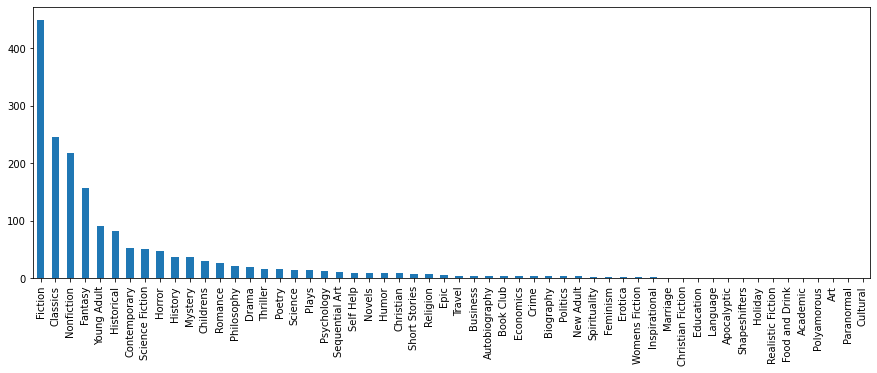

In [ ]:
books.Genre.value_counts().plot(x='genre',y = 'count',kind = 'bar',figsize = (15,5))

In [ ]:
print(books['Title'][1])
books['Description'][1]

Pride and Prejudice


'Alternate cover edition of ISBN 9780679783268Since its immediate success in 1813, Pride and Prejudice has remained one of the most popular novels in the English language. Jane Austen called this brilliant work "her own darling child" and its vivacious heroine, Elizabeth Bennet, "as delightful a creature as ever appeared in print." The romantic clash between the opinionated\nAlternate cover edition of ISBN 9780679783268Since its immediate success in 1813, Pride and Prejudice has remained one of the most popular novels in the English language. Jane Austen called this brilliant work "her own darling child" and its vivacious heroine, Elizabeth Bennet, "as delightful a creature as ever appeared in print." The romantic clash between the opinionated Elizabeth and her proud beau, Mr. Darcy, is a splendid performance of civilized sparring. And Jane Austen\'s radiant wit sparkles as her characters dance a delicate quadrille of flirtation and intrigue, making this book the most superb comedy of 

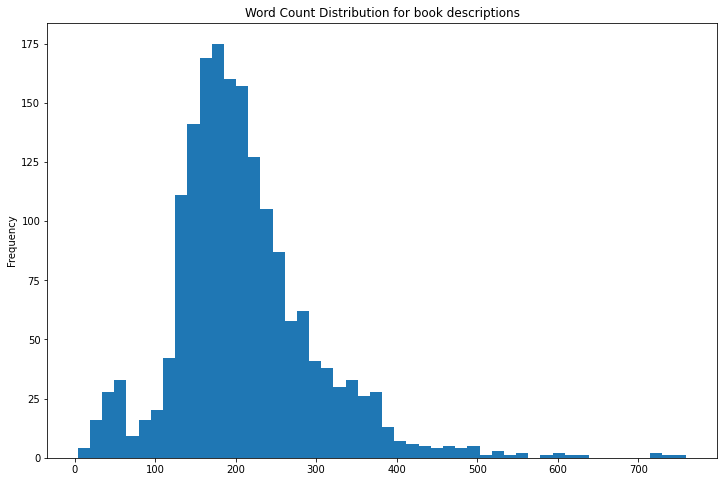

In [ ]:
#Calculating the word count for book description

books['Word_count'] = books['Description'].apply(lambda x: len(str(x).split()))# Plotting the word count
books['Word_count'].plot(kind='hist',bins = 50,figsize = (12,8),title='Word Count Distribution for book descriptions')

In [ ]:
import plotly.express as px

fig = px.pie(books, values=books['Genre'].value_counts().values, names=books['Genre'].value_counts().index)
fig.update_traces(hoverinfo='label+percent', textinfo='value')

In [ ]:
#filtering books with genres consiting more than 100 books
df = books[books['Genre'].map(books['Genre'].value_counts()) > 100]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1071 entries, 0 to 1786
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        1071 non-null   object
 1   Author       1071 non-null   object
 2   Ratings      1071 non-null   object
 3   Genre        1071 non-null   object
 4   Description  1071 non-null   object
 5   Word_count   1071 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 58.6+ KB


<Figure size 864x720 with 0 Axes>

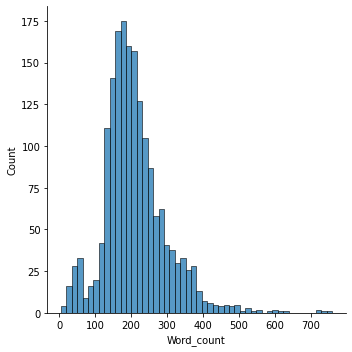

In [ ]:
import seaborn as sns
plt.figure(figsize=[12,10])
sns.displot(books['Word_count'])

## Data Preprocessing

In [ ]:
# creating a sub dataframe of fiction books with  less than 160 word count.
df1 = df[(df.Genre == 'Fiction') & (df.Word_count <= 160)]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 39 to 1786
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        128 non-null    object
 1   Author       128 non-null    object
 2   Ratings      128 non-null    object
 3   Genre        128 non-null    object
 4   Description  128 non-null    object
 5   Word_count   128 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 7.0+ KB


In [ ]:
# dropping the  rows created in df2 from the df1 column.
df.drop(df1.index,axis=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = px.pie(df, values=df['Genre'].value_counts().values, names=df['Genre'].value_counts().index)
fig.update_traces(hoverinfo='label+percent', textinfo='value')

In [ ]:
df.head()

,Title,Author,Ratings,Genre,Description,Word_count
0,Harry Potter and the Sorcerer's Stone,J.K. Rowling,4.47,Fantasy,Harry Potter&aposs life is miserable. His pare...,287
1,Pride and Prejudice,Jane Austen,4.27,Classics,Alternate cover edition of ISBN 9780679783268S...,158
2,The Diary of a Young Girl,Anne Frank,4.17,Nonfiction,Discovered in the attic in which she spent the...,232
3,Animal Farm,George Orwell,3.97,Classics,Librarian&aposs note: There is an Alternate Co...,187
4,The Great Gatsby,F. Scott Fitzgerald,3.93,Classics,Alternate Cover Edition ISBN: 0743273567 (ISBN...,162


In [ ]:
X = df[['Title','Author','Ratings','Description']]
X

,Title,Author,Ratings,Description
0,Harry Potter and the Sorcerer's Stone,J.K. Rowling,4.47,Harry Potter&aposs life is miserable. His pare...
1,Pride and Prejudice,Jane Austen,4.27,Alternate cover edition of ISBN 9780679783268S...
2,The Diary of a Young Girl,Anne Frank,4.17,Discovered in the attic in which she spent the...
3,Animal Farm,George Orwell,3.97,Librarian&aposs note: There is an Alternate Co...
4,The Great Gatsby,F. Scott Fitzgerald,3.93,Alternate Cover Edition ISBN: 0743273567 (ISBN...
...,...,...,...,...
1773,Firefly Lane,Kristin Hannah,4.12,From the New York Times bestselling author of ...
1777,Packing for Mars: The Curious Science of Life ...,Mary Roach,3.93,The best-selling author of Stiff and Bonk expl...
1779,"God Bless You, Mr. Rosewater",Kurt Vonnegut Jr.,3.93,Second only to Slaughterhouse-Five of Vonnegut...
1780,The Immortals of Meluha,Amish Tripathi,4.11,1900 BC. In what modern Indians mistakenly cal...


In [ ]:
y = pd.DataFrame(df['Genre'])
y

,Genre
0,Fantasy
1,Classics
2,Nonfiction
3,Classics
4,Classics
...,...
1773,Fiction
1777,Nonfiction
1779,Fiction
1780,Fiction


In [ ]:
#importing the necessary libraries for balancing the data
from imblearn.over_sampling import SMOTEN
oversample = SMOTEN(sampling_strategy='minority')
X1,y1=oversample.fit_resample(X,y)

In [ ]:
X1.shape

(1107, 4)

In [ ]:
y1.shape

(1107, 1)

## Splitting data into training and Testing data set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#spliting the data into training 77% and test 33%
X_train,X_test,y_train,y_test= train_test_split(X1,y1,test_size=0.3,random_state=42)

print('Shape of training data:',(X_train.shape))
print('Shape of testing data:',(X_test.shape))

Shape of training data: (774, 4)
Shape of testing data: (333, 4)


## Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf= TfidfVectorizer(max_features=2000)

In [ ]:
x= tfidf.fit_transform(X_train).toarray()
x

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [ ]:
# Encode the labels
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
list(le.classes_)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



['Classics', 'Fantasy', 'Fiction', 'Nonfiction']

In [ ]:
y = le.transform(y)
y

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



array([1, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 3,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 3, 0, 0, 3, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 3, 0,
       0, 2, 2, 0, 2, 2, 0, 0, 3, 1, 0, 2, 2, 0, 0, 0, 2, 1, 2, 0, 2, 0,
       0, 0, 2, 3, 0, 3, 0, 3, 0, 0, 2, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 1, 2, 1, 2, 1, 1, 2, 3, 3, 3, 0, 3, 3, 0, 0, 2, 1, 3, 1,
       3, 2, 2, 0, 0, 0, 2, 2, 0, 0, 3, 2, 1, 2, 0, 2, 3, 0, 0, 2, 3, 0,
       0, 2, 3, 2, 0, 0, 1, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 3, 1, 3, 1, 2,
       2, 2, 0, 1, 2, 3, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 1,
       2, 3, 0, 2, 2, 1, 0, 0, 3, 0, 2, 0, 3, 1, 3, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 3, 3, 3, 2, 2, 0, 1, 1, 2, 1, 3, 2, 0, 0, 0, 0,
       2, 0, 3, 0, 1, 0, 1, 1, 0, 3, 2, 2, 3, 0, 2, 1, 2, 3, 0, 0, 3, 1,
       0, 3, 2, 3, 3, 3, 2, 3, 1, 0, 2, 2, 2, 1, 0,